# Übung 1: Backpropagation für Mehrschichtperzeptronen

In [482]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Spielzeugdatensatz
Laden Sie sich das Jupyter-Notebook ”Training eines MLPs auf MNIST” von der Vorlesungsseite auf Moodle herunter, das den Numpy-Code für den Backpropagation-Algorithmus für MLPs enthält. Statt auf MNIST werden wir zunächst ein einfacheres Perzeptron auf den Spielzeugdaten aus der Vorlesung trainieren.

### 1.1 
Erzeugen Sie 200 zweidimensionale Trainingsdatenpunkte mithilfe einer Gleichverteilung über dem Gebiet [−6, 6]×[−6, 6]. Speichern Sie diese in einer 200×2 Designmatrix.

In [483]:
train_data = np.random.uniform(low=-6, high=6, size=(200, 2))

### 1.2
Die Klassenlabels 0 und 1 werden so vergeben, dass alle Datenpunkte im 1. und 3.
Quadranten das Label 1 und im 2. und 4. Quadranten das Label 0 erhalten. Speichern
Sie die Labels in einem Array

In [484]:
train_labels = np.where((train_data[:, 0] >= 0) & (train_data[:, 1] >= 0) | (train_data[:, 0] <= 0) & (train_data[:, 1] <= 0), 1, 0)

### 1.3
Erzeugen Sie einen gleich großen Testdatensatz nach demselben Prinzip. 

In [485]:
# test data and test labels
test_data = np.random.uniform(low=-6, high=6, size=(200, 2))
test_labels = np.where((test_data[:, 0] >= 0) & (test_data[:, 1] >= 0) | (test_data[:, 0] <= 0) & (test_data[:, 1] <= 0), 1, 0)

Stellen Sie beide Datensätze zur Überprüfung als Scatterplot dar.

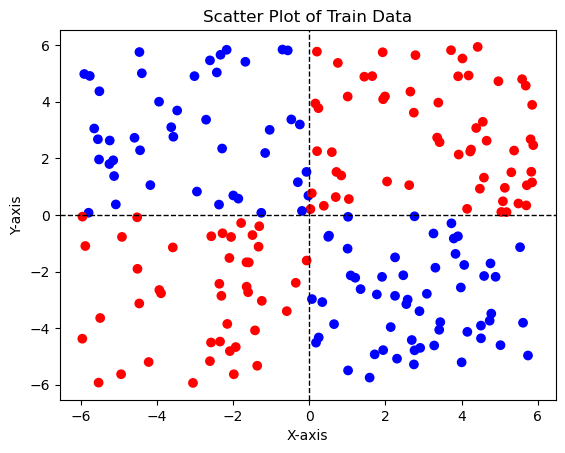

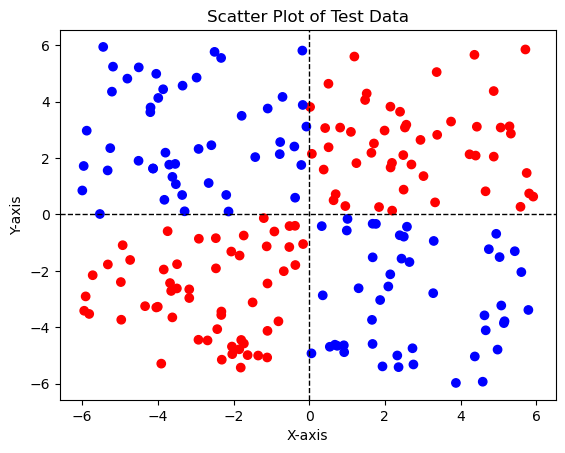

In [486]:
def plot_uniform(data, labels, title):
    colors = ['b' if y==0 else 'r' for y in labels]
    plt.scatter(data[:, 0], data[:, 1], c=colors, marker='o', label='Data Points')
    plt.axhline(0, color='black', linestyle='--', linewidth=1)
    plt.axvline(0, color='black', linestyle='--', linewidth=1)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title(title)
    plt.show()
    

plot_uniform(train_data, train_labels, 'Scatter Plot of Train Data')
plot_uniform(test_data, test_labels, 'Scatter Plot of Test Data')

### 1.4
Das in der Vorlesung dargestellte Experiment operiert nicht direkt auf den Inputdaten, sondern auf 2 Merkmalen, die mithilfe zweier Neuronen mit fixem Gewichtsvektor berechnet werden: ein Neuron teilt die Inputebene waagrecht entlang der x-Achse, das andere senkrecht entlang der y-Achse. Wie muss der Gewichtsvektor für das jeweilige Neuron aussehen?

Gewichtsvektoren müssen so aussehen:
w1 = [1  0]
w2 = [0  1]

In [487]:
# Gewichtsvektoren für die beiden Neuronen

w1 = np.array([1.0, 0.0])   # teilt entlang der y - Achse
w2 = np.array([0.0, 1.0])   # teilt entlang der x - Achse
w = np.array([w1, w2])
w.shape

(2, 2)

### 1.5
Berechnen Sie die Entscheidungsfunktion beider Neuron mit der im Beispielcode
angegebenen sigmoiden Aktivierungsfunktion auf einem 100 × 100-Gitter innerhalb
des Gebietes [−6, 6] × [−6, 6] und stellen Sie diese zur Überprüfung als Farbbild dar.

In [488]:
# Sigmoid (vektorisiert)
def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))


# Erzeugen eines 100x100-Gitters im Bereich [-6, 6] x [-6, 6]
x_vals = np.linspace(-6, 6, 100)
y_vals = np.linspace(-6, 6, 100)
x_grid, y_grid = np.meshgrid(x_vals, y_vals)

# Berechnen der Entscheidungsfunktionen für beide Neuronen mit Sigmoid-Aktivierungsfunktion
func_neuron_1 = sigmoid(x_grid)
func_neuron_2 = sigmoid(y_grid)

func_neuron_1_reshaped = func_neuron_1.reshape((100, 100))
func_neuron_2_reshaped = func_neuron_2.reshape((100, 100))

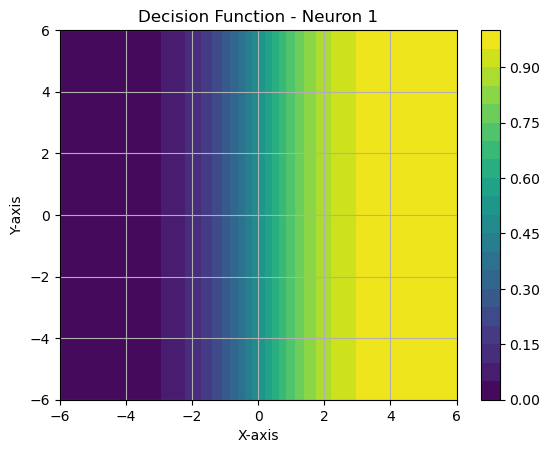

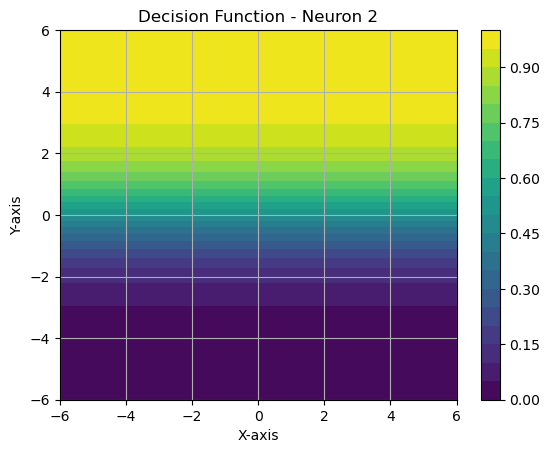

In [489]:
def plot_decision_function(x_vals, y_vals, func, title):
    plt.contourf(x_vals, y_vals, func, levels=20 ,cmap='viridis')
    plt.grid()
    plt.title('Decision Function - ' + title)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.colorbar()
    plt.show()

plot_decision_function(x_vals, y_vals, func_neuron_1_reshaped, "Neuron 1")
plot_decision_function(x_vals, y_vals, func_neuron_2_reshaped, "Neuron 2")

### 1.6
Da die Eingangsneuronen nicht mittrainiert werden, können wir deren Output schon
im Vorfeld berechnen. Erzeugen Sie dazu neue Designmatritzen für den Trainings- und Testdatensatz, so dass die erste Spalte den Output des ersten Neurons und die zweite Spalte den Output des zweiten Neurons enthält. Erzeugen Sie auch eine entsprechende Designmatrix für Ihr 100 × 100-Gitter, das wir später zu Darstellungszwecken brauchen werden. Wichtig: arbeiten Sie im Folgenden nur mit diesen transformierten Designmatritzen, um korrekte Ergebnisse zu erhalten!

In [490]:
# Ausgaben der Neuronen für Trainingsdaten berechnen
train_output_w1 = sigmoid(np.dot(train_data, w1))
train_output_w2 = sigmoid(np.dot(train_data, w2))
train_design = np.column_stack((train_output_w1, train_output_w2 ))

# Ausgaben der Neuronen für Testdaten berechnen
test_output_w1 = sigmoid(np.dot(test_data, w1))
test_output_w2 = sigmoid(np.dot(test_data, w2))
test_design = np.column_stack((test_output_w1, test_output_w2))

# Designmatrix für das 100x100-Gitter erstellen
grid_data_flat = np.column_stack((x_grid.flatten(), y_grid.flatten()))
X1 = np.dot(grid_data_flat, w1)
X2 = np.dot(grid_data_flat, w2)
X1_sig = sigmoid(X1)
X2_sig = sigmoid(X2)
grid_design = np.column_stack((X1_sig, X2_sig))

# Überprüfen der Form der neuen Designmatrizen
print("Form der neuen Designmatrizen:")
print("Trainingsoutput:", train_design.shape)
print("Testoutput:", test_design.shape)
print("Gridoutput:", grid_design.shape)

Form der neuen Designmatrizen:
Trainingsoutput: (200, 2)
Testoutput: (200, 2)
Gridoutput: (10000, 2)


## 2. Training eines MLPs auf den Spielzeugdaten
Der Code aus dem Beispielnotebook muss zunächst an das Szenario aus der Vorlesung angepasst werden: ein deutlich kleineres Netzwerk mit eindimensionalem statt zehndimensionalem Output.

### 2.1
Setzen Sie im Code die Größe der Minibatches auf 10, die Anzahl der Epochen
auf 150 und die Lernrate auf 0.03. Ändern Sie die Netzarchitektur so ab, dass sie 2 Eingangsneuronen, 2 verdeckte Schichten mit jeweils 2 Neuronen und 1 Ausgangsneuron haben. Überprüfen Sie die Größen der sich daraus ergebenden Gewichtsmatritzen auf Korrektheit.


In [491]:
# Netzwerkparameter
mbs = 10                     # Größe der Minibatches
eta = 0.03                    # Lernrate
no_hidden = 2                # Anzahl versteckter Neuronen
epochs = 150                 # Anzahl Epochen
sizes = [2, no_hidden, no_hidden, 1] # dreischichtiges MPL mit 2 Eingangs-,2x 2 no_hidden versteckten, 1 Ausgangsneuronen
num_layers = len(sizes)      # Anzahl Schichten

# Arrays für Gewichte und Schwellwerte (initialisiert mit Gaußschem Rauschen)
biases = [np.random.randn(y, 1) for y in sizes[1:]] # Schwellwerte
weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])] #Gewichte
for w in weights: 
    print(w.shape)

(2, 2)
(2, 2)
(1, 2)


### 2.2
Der Beispielcode verwendet One-Hot-Coding für die Labels, in unserem Beispiel sind
die Klassenzugehörigkeiten aber durch die Klassenindizes 0 und 1 codiert. Wir müssen daher die Funktion evaluate() im Code so abändern, dass ein Beispiel als korrekt klassifiziert gilt, wenn bei Klasse 0 der MLP-Output kleiner als 0.5 ist und bei Klasse 1 größer als 0.5. Berechnen Sie zusätzlich den MSE in dieser Funktion bei jedem Aufruf uns speichern Sie diesen in einem zusätzlichen Array ab.

In [492]:
# Einige Hilfsfunktionen:

# Sigmoid (vektorisiert)
def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))

# Ableitung des Sigmoids
def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))

# Ableitung der MSE-Kostenfunktion
def cost_derivative(output_activations, y):
    """Return the vector of partial derivatives \partial C_x /
    \partial a for the output activations."""
    return (output_activations-y)

# Vorwärtslauf durch das Netzwerk für Testläufe (Prädiktion):
def feedforward(a):
    """Return the output of the network if ``a`` is input."""
    for b, w in zip(biases, weights):
        a = sigmoid(np.dot(w, a)+b)
    return a

# Backpropagation-Algorithmus für ein Paar aus Input x und Label y:
def backprop(x, y):
    """Return a tuple ``(nabla_b, nabla_w)`` representing the
    gradient for the cost function C_x.  ``nabla_b`` and
    ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
    to ``self.biases`` and ``self.weights``."""
    
    # Initialisiere Updates für Schwellwerte und Gewichte
    nabla_b = [np.zeros(b.shape) for b in biases]
    nabla_w = [np.zeros(w.shape) for w in weights]
    
    # Vorwärtslauf
    activation = x # Initialisierung a^1 = x
    activations = [x] # list to store all the activations, layer by layer
    zs = [] # list to store all the z vectors, layer by layer
    for b, w in zip(biases, weights):
        z = np.dot(w, activation) + b
        zs.append(z)
        activation = sigmoid(z)
        activations.append(activation)
    
    # Rückwärtslauf
    delta = cost_derivative(activations[-1], y) * sigmoid_prime(zs[-1]) # Fehler am Output
    nabla_b[-1] = delta # Update Schwellwert in der Ausgangsschicht
    nabla_w[-1] = np.dot(delta, activations[-2].transpose()) # Update Gewichte in der Ausgangsschicht
    for l in range(2, num_layers): # Backpropagation
        z = zs[-l] # gewichteter Input
        sp = sigmoid_prime(z) # Ableitung der Aktivierungsfunktion
        delta = np.dot(weights[-l+1].transpose(), delta) * sp # Fehler in Schicht l
        nabla_b[-l] = delta # Update Schwellwert 
        nabla_w[-l] = np.dot(delta, activations[-l-1].transpose()) # Update Gewichte

    return (nabla_b, nabla_w)

# Gemitteltes Update über einen Minibatch:
def update_mini_batch(xmb, ymb, eta):
    """Update the network's weights and biases by applying
    gradient descent using backpropagation to a single mini batch.
    The ``mini_batch`` is a list of tuples ``(x, y)``, and ``eta``
    is the learning rate."""
    global weights
    global biases

    # Initialisiere Updates für Schwellwerte und Gewichte
    nabla_b = [np.zeros(b.shape) for b in biases]
    nabla_w = [np.zeros(w.shape) for w in weights]
    
    # Gehe durch alle Beispielpaare im Minibatch
    for i in range(xmb.shape[0]):
        x = np.reshape(xmb[i,:],(xmb.shape[1],1)).copy()
        if len(ymb.shape) == 2:
            y = np.reshape(ymb[i,:],(ymb.shape[1],1)).copy()
        else:
            y = ymb[i].copy()
        
        # Berechne Updates für alle Schichten über Backprop
        delta_nabla_b, delta_nabla_w = backprop(x, y)
        
        # Addiere einzelne Updates auf
        nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
        nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
    
    # Berechne neue Gewichte
    weights = [w-(eta/xmb.shape[0])*nw
                    for w, nw in zip(weights, nabla_w)]
    biases = [b-(eta/xmb.shape[0])*nb
                   for b, nb in zip(biases, nabla_b)]
    
    return (weights, biases)

Hilfsfunktion zur Evaluation des Netzwerkes auf den Testdaten:

In [493]:
from sklearn.metrics import mean_squared_error


def evaluate(x2, y2):
    """Return the number of test inputs for which the neural
    network outputs the correct result. Note that the neural
    network's output is assumed to be the index of whichever
    neuron in the final layer has the highest activation."""
    
    y_arr = []
    ypred_arr = []
    correct = 0 # Anzahl korrekt klassifizierter Testbeispiele
    
    # Gehe den Testdatensatz durch
    for i in range(0, x2.shape[0]):
        x = np.reshape(x2[i,:],(x2.shape[1],1)).copy()
        if len(y2.shape) == 2:
            y = np.reshape(y2[i,:],(y2.shape[1],1)).copy()
        else:
            y = y2[i].copy()
        
        # Vorwärtslauf
        ypred = feedforward(x)
        
        # print(ypred, y) # check shape for debugging
        ypred_arr.append(ypred[0][0])
        y_arr.append(y)
        
        if y <= 0.5:
            c = 0
        else:
            c = 1
        
        if ypred <= 0.5:
            cpred = 0
        else:
            cpred = 1
        
        # Falls beide übereinstimmen, addiere zur Gesamtzahl
        if c == cpred:
            correct += 1
            
    mse_lib = mean_squared_error(y_arr, ypred_arr)
    
    return correct, mse_lib

### 2.3
Trainieren Sie Ihr Netz mit den Trainingsdaten als Validierungsdaten und testen Sie es auf Ihren Testdaten. Stellen Sie die Lernkurven für Genauigkeit und MSE als Plots dar. Beachten Sie hierbei, dass unser Lernproblem nicht konvex ist, so dass die Optimierung zuweilen in lokalen Minima hängenbleiben kann. Wiederholen Sie Ihren Versuch daher mehrere Male und vergeleichen Sie die Ergebnisse.

Stochastischer Gradientenabstieg:

In [494]:
def SGD(x0, y0, epochs, mini_batch_size, eta, x2, y2):

    n_test = x2.shape[0] # Anzahl Testdaten
    n = x0.shape[0]      # Anzahl Trainingsdaten
    
    # gehe durch alle Epochen
    acc_val = np.zeros(epochs)
    mse = np.zeros(epochs)
    for j in range(epochs):
        
        # Bringe die Trainingsdaten in eine zufällige Reihenfolge für jede Epoche
        p = np.random.permutation(n) # Zufällige Permutation aller Indizes von 0 .. n-1
        x0 = x0[p,:]
        y0 = y0[p]
        
        # Zerlege den permutierten Datensatz in Minibatches 
        for k in range(0, n, mini_batch_size):
            xmb = x0[k:k+mini_batch_size,:]
            if len(y0.shape) == 2:
                ymb = y0[k:k+mini_batch_size,:]
            else:
                ymb = y0[k:k+mini_batch_size]
            update_mini_batch(xmb, ymb, eta)
        
        # Gib Performance aus
        acc_val[j], mse[j] = evaluate(x2, y2)
        print("\tLoss {0}: {1}".format(j, mse[j]))
        print("Epoch {0}: {1} / {2}".format(j, acc_val[j], n_test))
    
    return acc_val, mse

Training:

In [495]:
acc_val_save, mse_save = SGD(train_design, train_labels, epochs, mbs, eta, train_design, train_labels)

	Loss 0: 0.2507625541279525
Epoch 0: 100.0 / 200
	Loss 1: 0.2506908575973521
Epoch 1: 100.0 / 200
	Loss 2: 0.25063051705592676
Epoch 2: 100.0 / 200
	Loss 3: 0.25057388120401675
Epoch 3: 100.0 / 200
	Loss 4: 0.2505287400248541
Epoch 4: 100.0 / 200
	Loss 5: 0.2504883281124236
Epoch 5: 100.0 / 200
	Loss 6: 0.2504553233193059
Epoch 6: 100.0 / 200
	Loss 7: 0.25042562373059196
Epoch 7: 100.0 / 200
	Loss 8: 0.25040243846991905
Epoch 8: 100.0 / 200
	Loss 9: 0.2503793488051743
Epoch 9: 100.0 / 200
	Loss 10: 0.2503625414213838
Epoch 10: 100.0 / 200
	Loss 11: 0.2503457315590724
Epoch 11: 100.0 / 200
	Loss 12: 0.250332820752933
Epoch 12: 100.0 / 200
	Loss 13: 0.25032097646135043
Epoch 13: 100.0 / 200
	Loss 14: 0.25031046479262675
Epoch 14: 100.0 / 200
	Loss 15: 0.25030027536226024
Epoch 15: 100.0 / 200
	Loss 16: 0.2502927644148499
Epoch 16: 100.0 / 200
	Loss 17: 0.25028486755502244
Epoch 17: 100.0 / 200
	Loss 18: 0.25027961125852594
Epoch 18: 100.0 / 200
	Loss 19: 0.25027377201697687
Epoch 19: 100

Evaluation auf den unabhängigen Testdaten:

In [496]:
acc_val_test_save, loss_test_save = evaluate(test_design, test_labels)
print("Test accuracy: {0} / {1}".format(acc_val_test_save, test_design.shape[0]))
print("Test loss: {0}".format(loss_test_save))

Test accuracy: 79 / 200
Test loss: 0.24996109629637545


Lernkurve (Genauigkeit auf Validierungsdatensatz):

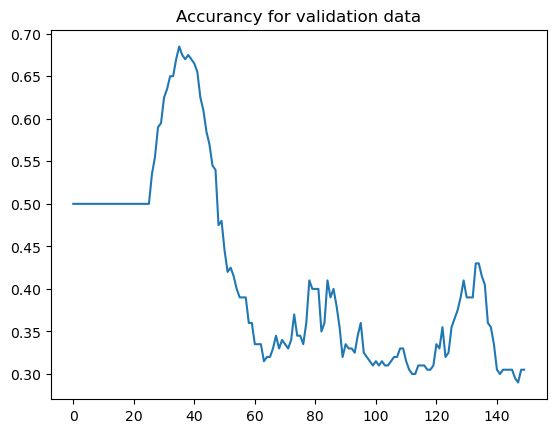

In [497]:
plt.plot(acc_val_save/train_design.shape[0])
plt.title("Accurancy for validation data");

Lernkurve für MSE auf Validierungsdatensatz

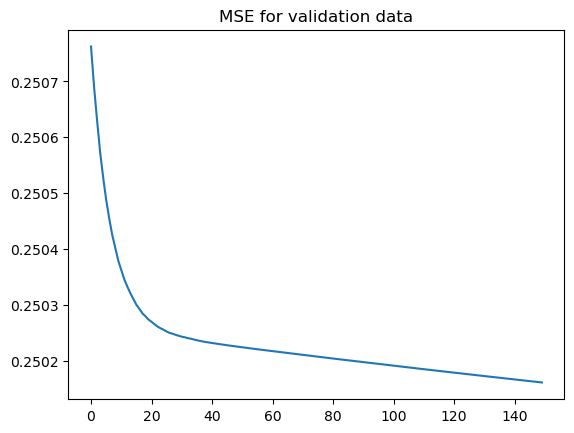

In [498]:
plt.plot(mse_save)
plt.title("MSE for validation data");

### 2.4
Berechnen Sie die Entscheidungsfunktion Ihres MLPs für Ihr 100 × 100-Gitter und
stellen Sie diese gemeinsam mit dem Scatterplot Ihrer Trainingsdaten dar.

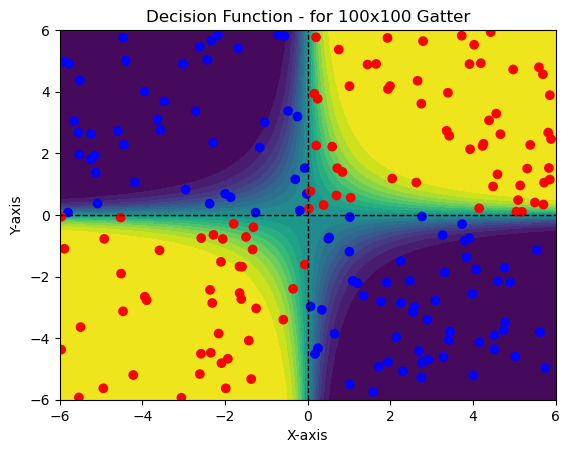

In [499]:
# Entscheidungsfunktion für das 100x100-Gitter berechnen
X1X2_sig = sigmoid(np.multiply(X1, X2)).reshape((100,100))

plt.contourf(x_vals, y_vals, X1X2_sig, levels=20, cmap='viridis')
plot_uniform(train_data, train_labels,'Decision Function - for 100x100 Gatter')

## 3. Nachvollziehen der Beispiele aus der Vorlesung
Das Netz aus der Vorlesung verwendet als Aktivierungsfunktion den Tangens hyperbolicus (np.tanh()). Passen Sie die Funktionen sigmoid() und sigmoid_prime() entsprechend an. Achtung: kommentieren Sie den bisherigen Code für die Sigmoidfunktion nur aus, wir werden ihn in der nächsten Aufgabe nochmals benötigen. Da die Ausgangswerte von tanh im Intervall [−1, 1] statt [0, 1] liegen, müssen wir hierfür nochmals die Funktion evaluate() entsprechend anpassen. Vollziehen Sie die 3 Beispiele aus der Vorlesung nach.

In [500]:
# Sigmoid (vektorisiert)
def sigmoid(z):
    """The sigmoid function."""
    #return 1.0/(1.0+np.exp(-z))
    return np.tanh(z)

# Ableitung des Sigmoids
def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return 1 - (np.tanh(z)**2) # oder 1/(np.cosh(z)**2)

def evaluate(x2, y2):
    """Return the number of test inputs for which the neural
    network outputs the correct result. Note that the neural
    network's output is assumed to be the index of whichever
    neuron in the final layer has the highest activation."""
    
    y_arr = []
    ypred_arr = []
    correct = 0 # Anzahl korrekt klassifizierter Testbeispiele
    
    # Gehe den Testdatensatz durch
    for i in range(0, x2.shape[0]):
        x = np.reshape(x2[i,:],(x2.shape[1],1)).copy()
        if len(y2.shape) == 2:
            y = np.reshape(y2[i,:],(y2.shape[1],1)).copy()
        else:
            y = y2[i].copy()
        
        # Vorwärtslauf
        ypred = feedforward(x)
        ypred_arr.append(ypred[0][0])
        y_arr.append(y)
        
        if y <= 0.0:
            c = 0
        else:
            c = 1
        
        if ypred <= 0.0:
            cpred = 0
        else:
            cpred = 1
        
        # Falls beide übereinstimmen, addiere zur Gesamtzahl
        if c == cpred:
            correct += 1
    
    mse_lib = mean_squared_error(y_arr, ypred_arr)
    
    return correct, mse_lib

Experiment 1: eine versteckte Schicht mit 2 Neuronen

In [501]:
# Netzwerkparameter
mbs = 10                     # Größe der Minibatches
eta = 0.03                   # Lernrate
no_hidden = 2                # Anzahl versteckter Neuronen
epochs = 150                 # Anzahl Epochen
sizes = [2, no_hidden, 1] # dreischichtiges MPL mit 2 Eingangs-,2x 2 no_hidden versteckten, 1 Ausgangsneuronen
num_layers = len(sizes)      # Anzahl Schichten

# Arrays für Gewichte und Schwellwerte (initialisiert mit Gaußschem Rauschen)
biases = [np.random.randn(y, 1) for y in sizes[1:]] # Schwellwerte
weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])] #Gewichte
for w in weights: 
    print(w.shape)

(2, 2)
(1, 2)


In [502]:
acc_val, mse = SGD(train_design, train_labels, epochs, mbs, eta, train_design, train_labels)

	Loss 0: 0.2818614975107343
Epoch 0: 100.0 / 200
	Loss 1: 0.27376843697697606
Epoch 1: 100.0 / 200
	Loss 2: 0.267779570345076
Epoch 2: 100.0 / 200
	Loss 3: 0.2630948636572292
Epoch 3: 100.0 / 200
	Loss 4: 0.25940491527168674
Epoch 4: 100.0 / 200
	Loss 5: 0.2563644813237395
Epoch 5: 100.0 / 200
	Loss 6: 0.2537534732116606
Epoch 6: 100.0 / 200
	Loss 7: 0.2515028082544655
Epoch 7: 100.0 / 200
	Loss 8: 0.24959160163352753
Epoch 8: 100.0 / 200
	Loss 9: 0.24795271569042818
Epoch 9: 100.0 / 200
	Loss 10: 0.24666265253240702
Epoch 10: 100.0 / 200
	Loss 11: 0.24530503208207302
Epoch 11: 100.0 / 200
	Loss 12: 0.24420099299058884
Epoch 12: 100.0 / 200
	Loss 13: 0.24323534861578544
Epoch 13: 100.0 / 200
	Loss 14: 0.24241841947986142
Epoch 14: 100.0 / 200
	Loss 15: 0.2416240347513441
Epoch 15: 100.0 / 200
	Loss 16: 0.24095696974250344
Epoch 16: 100.0 / 200
	Loss 17: 0.24032635218222306
Epoch 17: 100.0 / 200
	Loss 18: 0.2397726944873976
Epoch 18: 100.0 / 200
	Loss 19: 0.23923637248482585
Epoch 19: 1

Test accuracy: 106 / 200
Test loss: 0.21021694966758298


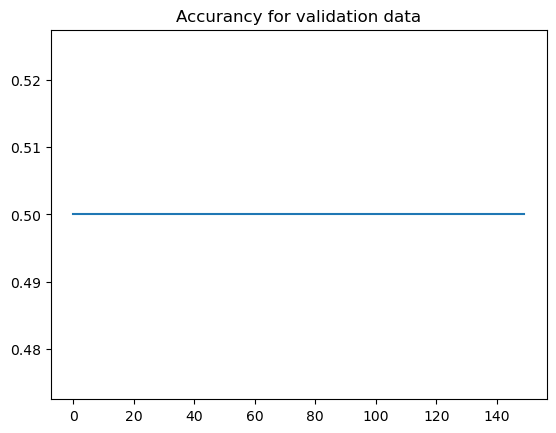

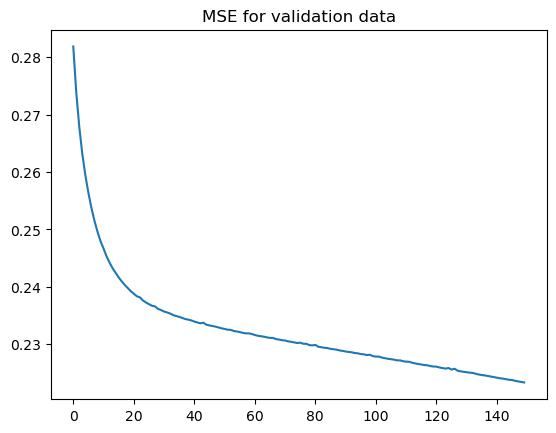

In [503]:
acc_val_test, loss_test = evaluate(test_design, test_labels)
print("Test accuracy: {0} / {1}".format(acc_val_test, test_design.shape[0]))
print("Test loss: {0}".format(loss_test))

plt.plot(acc_val/train_design.shape[0])
plt.title("Accurancy for validation data")
plt.show()

plt.plot(mse)
plt.title("MSE for validation data")
plt.show()

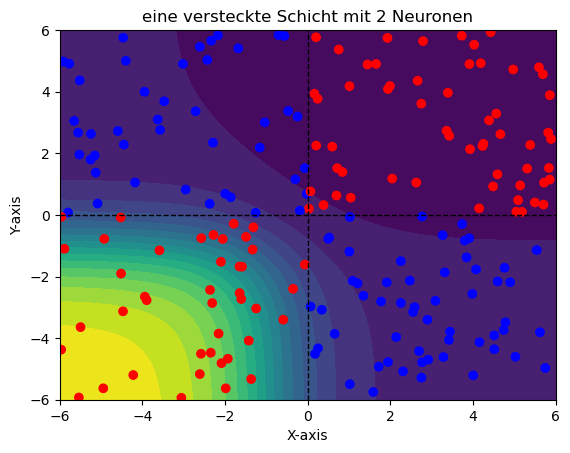

In [504]:
def sigmoid_multi_dim(output_matrix):
    for i in range(output_matrix.shape[1]):
        output_matrix[:,i] = sigmoid(output_matrix[:,i])
    return output_matrix
    

# hidden layer 1
output_hid_l1 = np.dot(grid_design, weights[0].T)
output_hid_l1 = sigmoid_multi_dim(output_hid_l1)

# output layer
output = np.dot(output_hid_l1, weights[1].T)
output = sigmoid_multi_dim(output)
output = output.reshape((100,100))

plt.contourf(x_vals, y_vals, output, levels=20, cmap='viridis')
plot_uniform(train_data, train_labels, "eine versteckte Schicht mit 2 Neuronen")

Experiment 2: eine versteckte Schicht mit 3 Neuronen

In [505]:
# Netzwerkparameter
mbs = 10                     # Größe der Minibatches
eta = 0.03                    # Lernrate
no_hidden = 3                # Anzahl versteckter Neuronen
epochs = 150                 # Anzahl Epochen
sizes = [2, no_hidden, 1] # dreischichtiges MPL mit 2 Eingangs-,2x 2 no_hidden versteckten, 1 Ausgangsneuronen
num_layers = len(sizes)      # Anzahl Schichten

# Arrays für Gewichte und Schwellwerte (initialisiert mit Gaußschem Rauschen)
biases = [np.random.randn(y, 1) for y in sizes[1:]] # Schwellwerte
weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])] #Gewichte
for w in weights: 
    print(w.shape)

(3, 2)
(1, 3)


In [506]:
acc_val, mse = SGD(train_design, train_labels, epochs, mbs, eta, train_design, train_labels)

	Loss 0: 0.2616352354604042
Epoch 0: 100.0 / 200
	Loss 1: 0.25919072360597195
Epoch 1: 100.0 / 200
	Loss 2: 0.2569883625467857
Epoch 2: 100.0 / 200
	Loss 3: 0.2550304076445869
Epoch 3: 100.0 / 200
	Loss 4: 0.2532655450967296
Epoch 4: 100.0 / 200
	Loss 5: 0.25170712674871143
Epoch 5: 100.0 / 200
	Loss 6: 0.2502150998900933
Epoch 6: 100.0 / 200
	Loss 7: 0.24887930459698596
Epoch 7: 100.0 / 200
	Loss 8: 0.24764855374253344
Epoch 8: 100.0 / 200
	Loss 9: 0.2465283349851515
Epoch 9: 100.0 / 200
	Loss 10: 0.245490790032344
Epoch 10: 100.0 / 200
	Loss 11: 0.2445069496828102
Epoch 11: 100.0 / 200
	Loss 12: 0.24358931908788722
Epoch 12: 100.0 / 200
	Loss 13: 0.24273224788641862
Epoch 13: 100.0 / 200
	Loss 14: 0.24194163699781498
Epoch 14: 100.0 / 200
	Loss 15: 0.24117928549147272
Epoch 15: 100.0 / 200
	Loss 16: 0.2404577123272756
Epoch 16: 100.0 / 200
	Loss 17: 0.23977068164351445
Epoch 17: 100.0 / 200
	Loss 18: 0.239126271787935
Epoch 18: 100.0 / 200
	Loss 19: 0.2385656725597621
Epoch 19: 100.0

Test accuracy: 107 / 200
Test loss: 0.20549786662492175


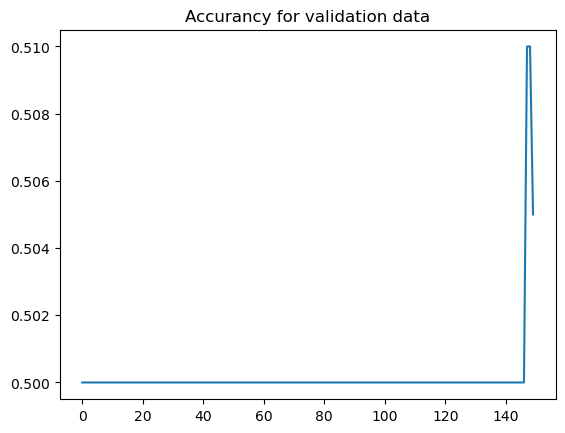

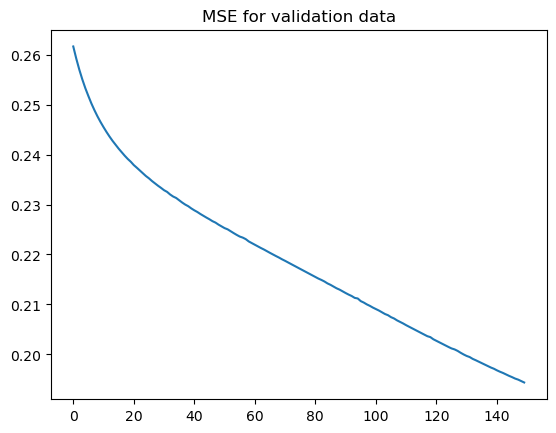

In [507]:
acc_val_test, loss_test = evaluate(test_design, test_labels)
print("Test accuracy: {0} / {1}".format(acc_val_test, test_design.shape[0]))
print("Test loss: {0}".format(loss_test))

plt.plot(acc_val/train_design.shape[0])
plt.title("Accurancy for validation data")
plt.show()

plt.plot(mse)
plt.title("MSE for validation data")
plt.show()

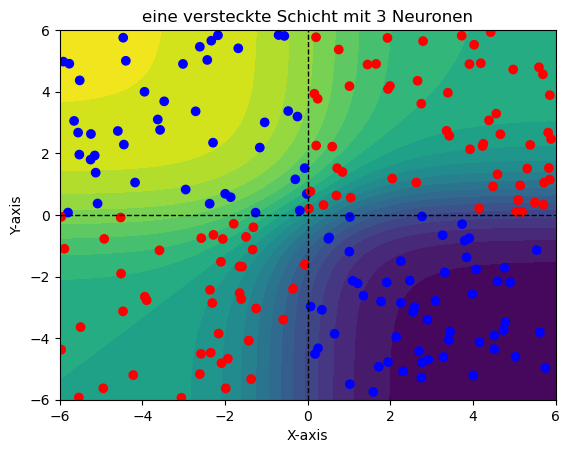

In [508]:
# hidden layer 1
output_hid_l1 = np.dot(grid_design, weights[0].T)
output_hid_l1 = sigmoid_multi_dim(output_hid_l1)

# output layer
output = np.dot(output_hid_l1, weights[1].T)
output = sigmoid_multi_dim(output)
output = output.reshape((100,100))

plt.contourf(x_vals, y_vals, output, levels=20, cmap='viridis')
plot_uniform(train_data, train_labels, "eine versteckte Schicht mit 3 Neuronen")

Experiment 3: zwei versteckte Schichten

In [509]:
# Netzwerkparameter
mbs = 10                     # Größe der Minibatches
eta = 0.03                    # Lernrate
no_hidden_1 = 3              # Anzahl versteckter Neuronen
no_hidden_2 = 2
epochs = 150                 # Anzahl Epochen
sizes = [2, no_hidden_1, no_hidden_2, 1] # dreischichtiges MPL mit 2 Eingangs-,2x 2 no_hidden versteckten, 1 Ausgangsneuronen
num_layers = len(sizes)      # Anzahl Schichten

# Arrays für Gewichte und Schwellwerte (initialisiert mit Gaußschem Rauschen)
biases = [np.random.randn(y, 1) for y in sizes[1:]] # Schwellwerte
weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])] #Gewichte
for w in weights: 
    print(w.shape)

(3, 2)
(2, 3)
(1, 2)


In [510]:
acc_val, mse = SGD(train_design, train_labels, epochs, mbs, eta, train_design, train_labels)

	Loss 0: 2.3783994006914297
Epoch 0: 100.0 / 200
	Loss 1: 2.2076756664192216
Epoch 1: 100.0 / 200
	Loss 2: 0.8961253305063965
Epoch 2: 100.0 / 200
	Loss 3: 0.2511984969727997
Epoch 3: 100.0 / 200
	Loss 4: 0.23042342096267043
Epoch 4: 100.0 / 200
	Loss 5: 0.22626825632089764
Epoch 5: 100.0 / 200
	Loss 6: 0.2229874536138621
Epoch 6: 100.0 / 200
	Loss 7: 0.21982667897290395
Epoch 7: 100.0 / 200
	Loss 8: 0.21686264331466382
Epoch 8: 100.0 / 200
	Loss 9: 0.2139522016734426
Epoch 9: 100.0 / 200
	Loss 10: 0.21146696225650913
Epoch 10: 100.0 / 200
	Loss 11: 0.20928759863063173
Epoch 11: 100.0 / 200
	Loss 12: 0.20726351754884667
Epoch 12: 100.0 / 200
	Loss 13: 0.2052372723878576
Epoch 13: 100.0 / 200
	Loss 14: 0.20366985723003733
Epoch 14: 100.0 / 200
	Loss 15: 0.2022971464857087
Epoch 15: 100.0 / 200
	Loss 16: 0.20116888190401752
Epoch 16: 100.0 / 200
	Loss 17: 0.20011974228161353
Epoch 17: 100.0 / 200
	Loss 18: 0.19923668104787431
Epoch 18: 109.0 / 200
	Loss 19: 0.19838859835567985
Epoch 19: 

Test accuracy: 122 / 200
Test loss: 0.18663392361644768


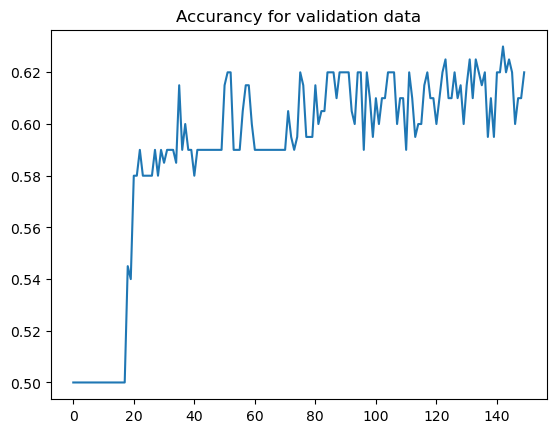

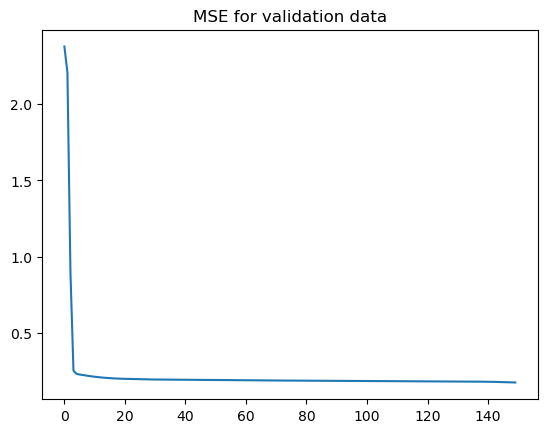

In [511]:
acc_val_test, loss_test = evaluate(test_design, test_labels)
print("Test accuracy: {0} / {1}".format(acc_val_test, test_design.shape[0]))
print("Test loss: {0}".format(loss_test))

plt.plot(acc_val/train_design.shape[0])
plt.title("Accurancy for validation data")
plt.show()

plt.plot(mse)
plt.title("MSE for validation data")
plt.show()

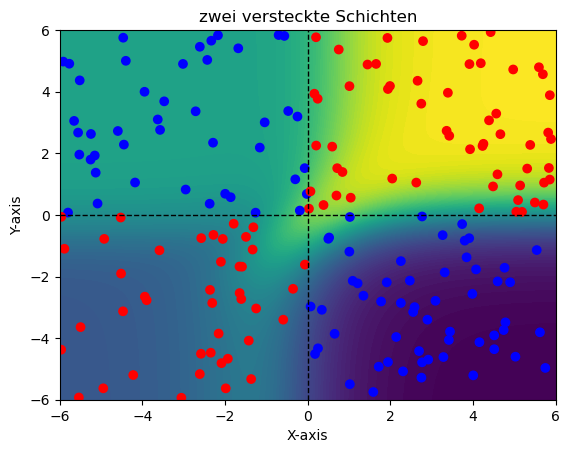

In [512]:
# hidden layer 1
output_hid_l1 = np.dot(grid_design, weights[0].T)
output_hid_l1 = sigmoid_multi_dim(output_hid_l1)

# hidden layer 2
output_hid_l2 = np.dot(output_hid_l1, weights[1].T)
output_hid_l2 = sigmoid_multi_dim(output_hid_l2)

# output layer
output = np.dot(output_hid_l2, weights[2].T)
output = sigmoid_multi_dim(output)
output = output.reshape((100,100))

plt.contourf(x_vals, y_vals, output, levels=100, cmap='viridis')
plot_uniform(train_data, train_labels, "zwei versteckte Schichten")

# 4. Logistische Regression
Eine alternative, besser an das Klassifikationsszenario angepasste Kostenfunktion statt des MSE ist die Kostenfunktion für die logistische Regression:
$C = −y * log(a^L) − (1 − y) * log(1 − a^L)$.
Damit Sie diese in Ihrem Beispiel anwenden können, müssen Sie die Ableitung $∇a^L C$ berechnen und die Funktion cost_derivative() entsprechend abändern. Da die logistische Regression davon ausgeht, dass der Output des Netzes eine Wahrscheinlichkeit zwischen 0 und 1 ist, können wir hierfür nicht den tanh() als Aktivierungsfunktion verwenden. Machen Sie daher Ihre Änderungen aus Aufgabe 3 rückgängig, so dass Sie wieder eine sigmoide Aktivierungsfunktion haben. In der Funktion evaluate() sollte natürlich statt des MSE die Kostenfunktion der logistischen Regression ausgegeben werden, um zu überprüfen, ob tatsächlich ein Gradientenabstieg stattfindet. Weiterhin ist es nützlich, sowohl auf $C$ wie auf $∇a^L C$ die Funktion np.nan_to_num() anzuwenden, da hier zuweilen numerische Probleme auftreten können. Auch die Lernrate muss angepasst werden: $η = 1.0$ funktioniert hier deutlich besser.

In [513]:
# Sigmoid (vektorisiert)
def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))

# Ableitung des Sigmoids
def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))

def cost_logistic_regression(y_pred, y):
    C = -y * np.log(y_pred) - (1 - y) * np.log(1 - y_pred)
    print(C)
    return np.nan_to_num(np.mean(C))

# Ableitung der MSE-Kostenfunktion
def cost_derivative(output_activations, y):
    """Return the vector of partial derivatives \partial C_x /
    \partial a for the output activations."""
    return np.nan_to_num((1 - y) / (1 - output_activations) - y / output_activations)

def evaluate(x2, y2):
    """Return the number of test inputs for which the neural
    network outputs the correct result. Note that the neural
    network's output is assumed to be the index of whichever
    neuron in the final layer has the highest activation."""
    
    y_arr = []
    ypred_arr = []
    correct = 0 # Anzahl korrekt klassifizierter Testbeispiele
    
    # Gehe den Testdatensatz durch
    for i in range(0, x2.shape[0]):
        x = np.reshape(x2[i,:],(x2.shape[1],1)).copy()
        if len(y2.shape) == 2:
            y = np.reshape(y2[i,:],(y2.shape[1],1)).copy()
        else:
            y = y2[i].copy()
        
        # Vorwärtslauf
        ypred = feedforward(x)
        ypred_arr.append(ypred[0][0])
        y_arr.append(y)
        
        if y <= 0.5:
            c = 0
        else:
            c = 1
        
        if ypred <= 0.5:
            cpred = 0
        else:
            cpred = 1
        
        # Falls beide übereinstimmen, addiere zur Gesamtzahl
        if c == cpred:
            correct += 1
    
    y_arr = np.array(y_arr)
    ypred_arr = np.array(y_arr)
    print(y_arr, ypred_arr)
    C = cost_logistic_regression(ypred_arr, y_arr)
    
    return correct, C

In [514]:
# Netzwerkparameter
mbs = 10                     # Größe der Minibatches
eta = 1.0                   # Lernrate
no_hidden = 2                # Anzahl versteckter Neuronen
epochs = 150                 # Anzahl Epochen
sizes = [2, no_hidden, no_hidden, 1] # dreischichtiges MPL mit 2 Eingangs-,2x 2 no_hidden versteckten, 1 Ausgangsneuronen
num_layers = len(sizes)      # Anzahl Schichten

# Arrays für Gewichte und Schwellwerte (initialisiert mit Gaußschem Rauschen)
biases = [np.random.randn(y, 1) for y in sizes[1:]] # Schwellwerte
weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])] #Gewichte
for w in weights: 
    print(w.shape)

(2, 2)
(2, 2)
(1, 2)


In [515]:
acc_val, loglikes = SGD(train_design, train_labels, epochs, mbs, eta, train_design, train_labels)

[0 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0
 1 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 1 0
 0 0 1 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0
 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0
 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0] [0 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0
 1 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 1 0
 0 0 1 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0
 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0
 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan

C:\Users\HTWG\AppData\Local\Temp\ipykernel_18520\2215449434.py:12: RuntimeWarning: divide by zero encountered in log
  C = -y * np.log(y_pred) - (1 - y) * np.log(1 - y_pred)
C:\Users\HTWG\AppData\Local\Temp\ipykernel_18520\2215449434.py:12: RuntimeWarning: invalid value encountered in multiply
  C = -y * np.log(y_pred) - (1 - y) * np.log(1 - y_pred)


[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
	Loss 2: 0.0
Epoch 2: 100.0 / 200
[0 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0
 1 

[1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1
 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1
 0 1 1 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 0
 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 0
 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 0
 0 1 1 0 1 0 1 1 1 1 0 0 1 1 0] [1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1
 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1
 0 1 1 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 0
 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 0
 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 0
 0 1 1 0 1 0 1 1 1 1 0 0 1 1 0]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan

C:\Users\HTWG\AppData\Local\Temp\ipykernel_18520\2215449434.py:12: RuntimeWarning: divide by zero encountered in log
  C = -y * np.log(y_pred) - (1 - y) * np.log(1 - y_pred)
C:\Users\HTWG\AppData\Local\Temp\ipykernel_18520\2215449434.py:12: RuntimeWarning: invalid value encountered in multiply
  C = -y * np.log(y_pred) - (1 - y) * np.log(1 - y_pred)


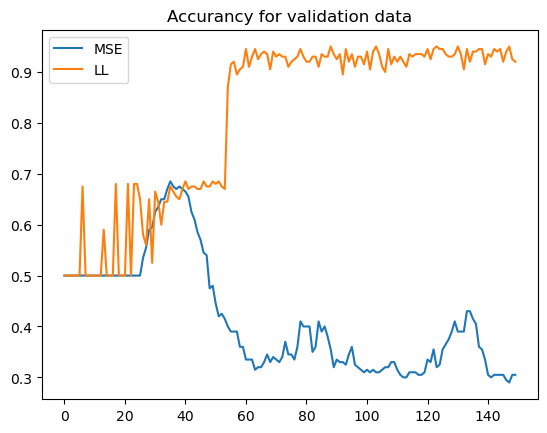

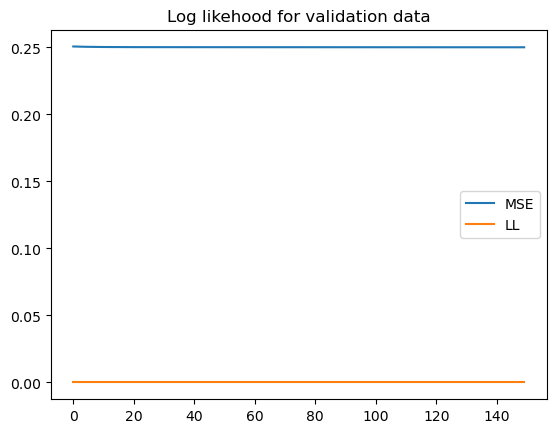

In [516]:
acc_val_test, loss_test = evaluate(test_design, test_labels)
print("Test accuracy: {0} / {1}".format(acc_val_test, test_design.shape[0]))
print("Test loss: {0}".format(loss_test))
print("\nwith MSE:")
print("Test accuracy: {0} / {1}".format(acc_val_test_save, test_design.shape[0]))
print("Test loss: {0}".format(loss_test_save))

plt.plot(acc_val_save/train_design.shape[0], label="MSE")
plt.plot(acc_val/train_design.shape[0], label="LL")
plt.title("Accurancy for validation data")
plt.legend()
plt.show()

plt.plot(mse_save, label="MSE")
plt.plot(loglikes, label="LL")
plt.title("Log likehood for validation data");
plt.legend()
plt.show()